In [1]:
##Alunos: Guilherme Milani e Ricardo Berndt

In [2]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


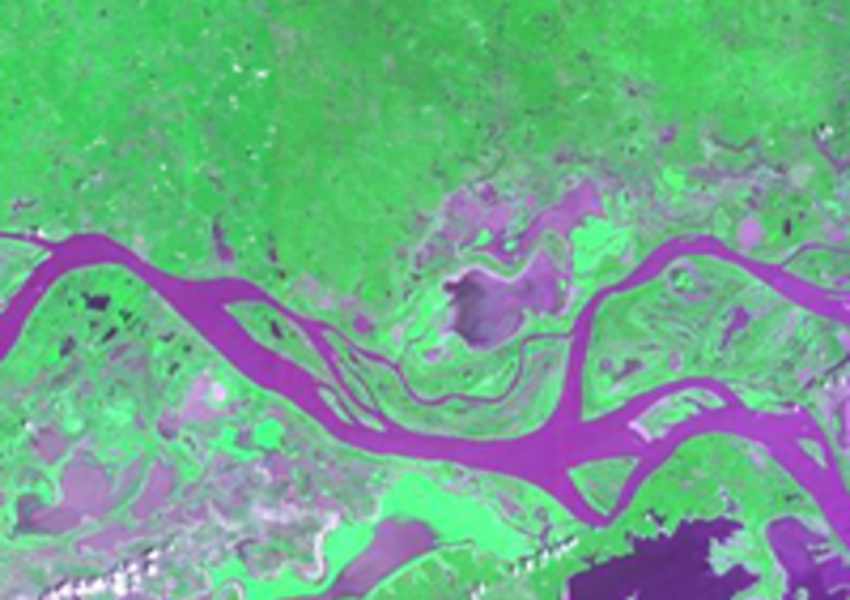

In [12]:
from IPython.display import Image as IPImage, display
from PIL import Image as PILImage
import numpy as np

def transformarImagensMesmoTamanho(imagem_entrada, altura, largura):
     new_size = (largura, altura)
     img = PILImage.open(imagem_entrada)
    
     resized_img = img.resize(new_size)
    
    # Save the resized image
     resized_img.save(imagem_entrada)

def converterParaPretoEBranco(imagem_entrada, imagem_saida):
    img = PILImage.open(imagem_entrada)
    img_bw = img.convert('L')
    img_bw.save(imagem_saida)

##transformarImagensMesmoTamanho('chuvoso.png',600, 850)
##transformarImagensMesmoTamanho('estiagem.png',600, 850)

converterParaPretoEBranco('chuvoso.png','saida_preto_e_branco_chuvoso.png')
converterParaPretoEBranco('estiagem.png', 'saida_preto_e_branco_estiagem.png')

display(IPImage(filename='estiagem.png', width = 300))


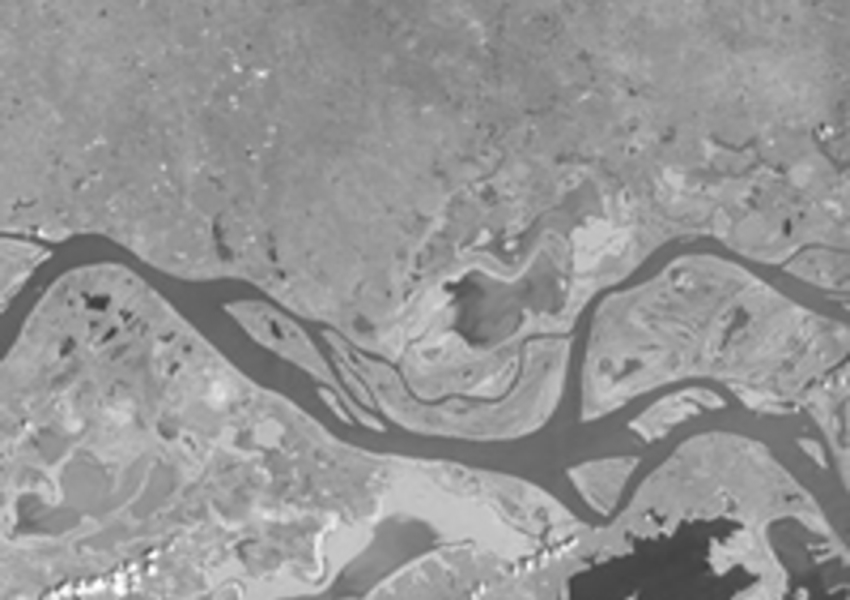

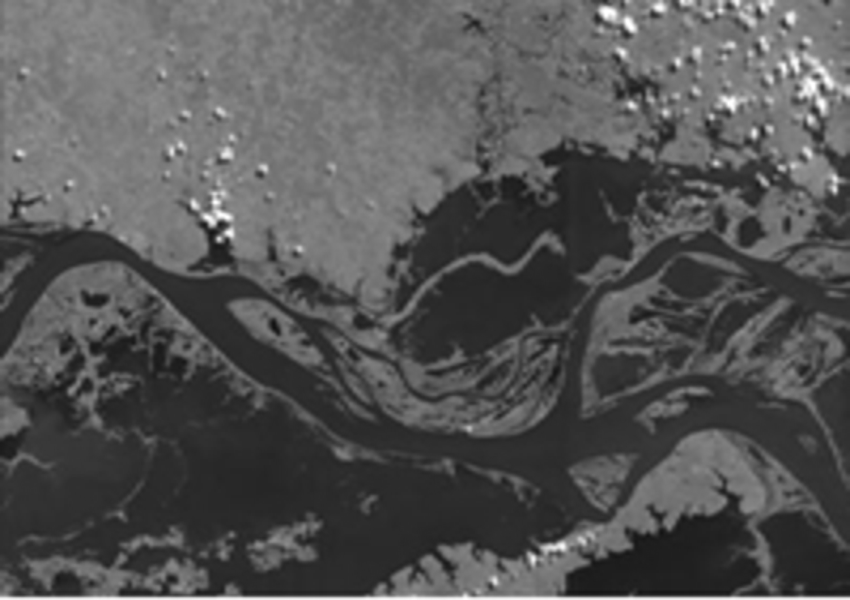

In [13]:
display(IPImage(filename='saida_preto_e_branco_estiagem.png', width = 300))
display(IPImage(filename='saida_preto_e_branco_chuvoso.png', width = 300))

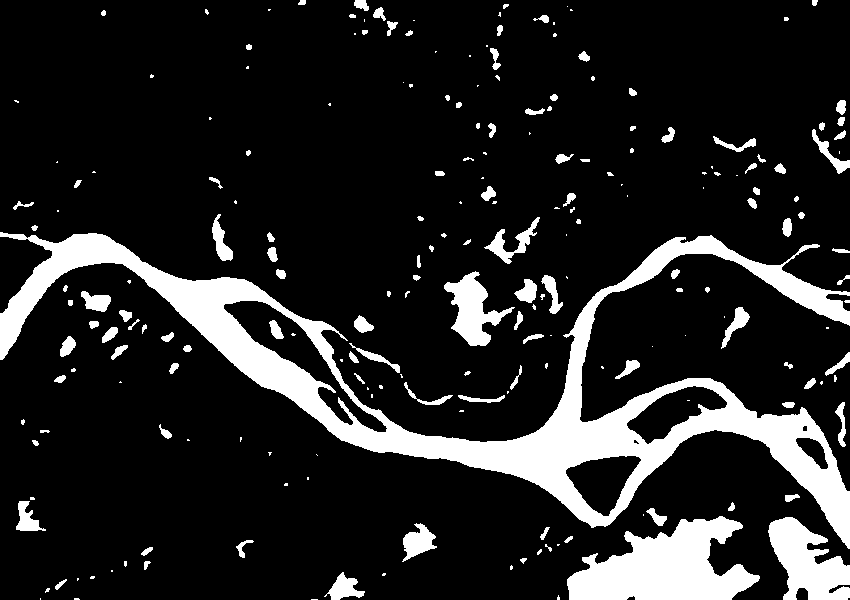

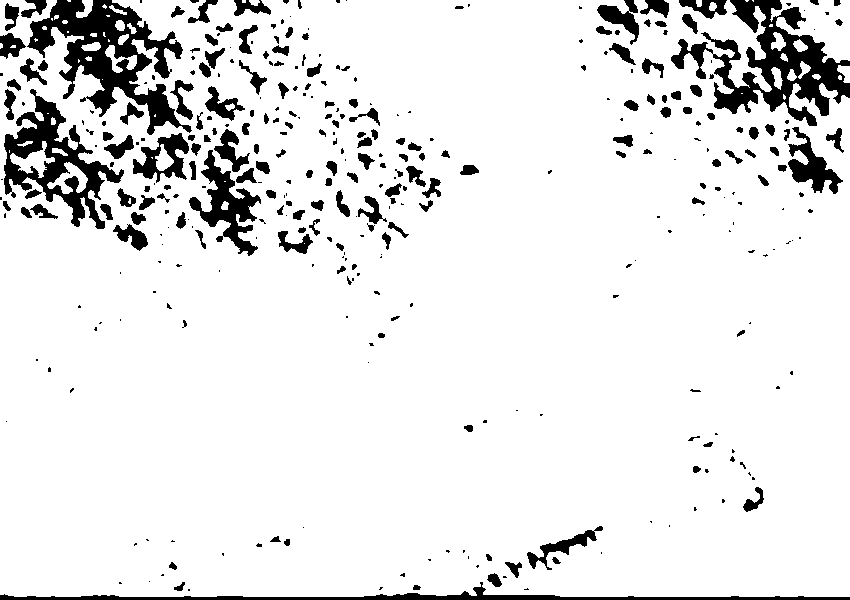

In [14]:
def binarizacao(imagem_entrada, imagem_saida):
    img = PILImage.open(imagem_entrada)
    img_array = np.array(img)
    binary_array = np.where(img_array <= 127, 255, 0)
    binary_img = PILImage.fromarray(binary_array.astype(np.uint8))
    binary_img.save(imagem_saida)

binarizacao('saida_preto_e_branco_estiagem.png', 'saida_binarizada_estiagem.png')
binarizacao('saida_preto_e_branco_chuvoso.png', 'saida_binarizada_chuvoso.png')
display(IPImage(filename='saida_binarizada_estiagem.png', width=300))
display(IPImage(filename='saida_binarizada_chuvoso.png', width=300))